In [1]:
import numpy as np
import pandas as pd
import openml
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [3]:
# Get dataset by name
dataset = openml.datasets.get_dataset('mnist_784')

# Get the data itself as a dataframe (or otherwise)
X_pd, y_pd, categorical_indicator, attribute_names = dataset.get_data(
    target=dataset.default_target_attribute, dataset_format="dataframe"
)

In [4]:
# Convert to numpy array
X = X_pd.to_numpy()
y = y_pd.to_numpy().astype(np.int32)
# Train Split
X_train=X[:10000]
X_test=X[10000:12000]
# Test Split
y_train=y[:10000]
y_test=y[10000:12000]

In [5]:
dig_5_idx = np.where(y_train == 5)[0]
dig_3_idx = np.where(y_train == 3)[0]
index = np.concatenate((dig_5_idx,dig_3_idx))
# get all samples from the index array
X_train_53 = X_train[index,:]
# create the label vector
y_train_53 = np.concatenate(((np.ones(len(dig_5_idx))*1),(np.ones(len(dig_3_idx))*-1)))

In [6]:
dig_5_idx_t = np.where(y_test == 5)[0]
dig_3_idx_t = np.where(y_test == 3)[0]
index = np.concatenate((dig_5_idx_t,dig_3_idx_t))
# get all samples from the index array
X_test_53 = X_test[index,:]
# create the label vector
y_test_53 = np.concatenate(((np.ones(len(dig_5_idx_t))*1),(np.ones(len(dig_3_idx_t))*-1)))

In [7]:
clf=Perceptron(random_state=42,
               # max_iter=2,
               shuffle=False,
               max_iter=100)

In [8]:
clf.fit(X_train_53,y_train_53)

Perceptron(max_iter=100, random_state=42, shuffle=False)

In [9]:
y_pred=clf.predict(X_test_53)

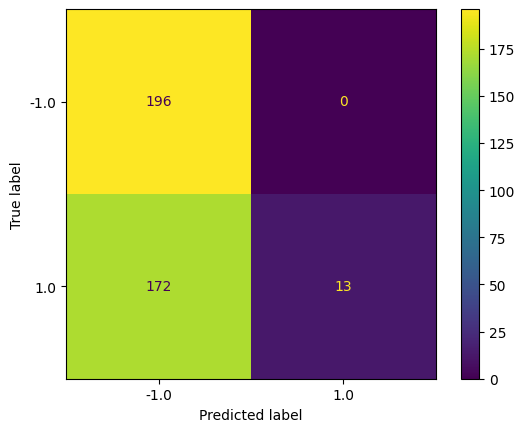

In [10]:
cp=confusion_matrix(y_test_53,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cp,display_labels=clf.classes_)
disp.plot()

In [11]:
# clf.score(X_train_53,y_train_53)

In [12]:
clf.score(X_test_53,y_test_53)

0.5485564304461942

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('accuracy_score',accuracy_score(y_test_53,y_pred))
print('precision_score',precision_score(y_test_53,y_pred))
print('recall_score',recall_score(y_test_53,y_pred))

accuracy_score 0.5485564304461942
precision_score 1.0
recall_score 0.07027027027027027
